In [2]:
!pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4

In [3]:
!pip install geopandas libpysal esda matplotlib

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from libpysal.weights import DistanceBand
from esda.moran import Moran
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_excel('/content/sample_radiosonde.xlsx')

In [7]:
df.head()

,Height,Temp,Pres,Latitude,Longitude
0,257.000000,29.143333,982.718811,79.670000,18.960000
1,262.582861,29.124724,982.065887,79.671037,18.961257
2,268.165722,29.106114,981.413397,79.672074,18.962514
3,273.748583,29.087505,980.761341,79.673111,18.963771
4,279.331444,29.068895,980.109718,79.674148,18.965028


In [8]:
# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"])
)


In [9]:
# Create spatial weights matrix using Distance Band (adjust the threshold as needed)
distance_threshold = 1.0  # Maximum distance in degrees (or meters if coordinates are projected)
weights = DistanceBand.from_dataframe(gdf, threshold=distance_threshold, silence_warnings=True)


In [10]:
# Compute Moran's I for each variable and store results
spatial_autocorrelation = {}

for column in ["Height", "Temp", "Pres"]:
    y = gdf[column].values
    moran = Moran(y, weights)
    spatial_autocorrelation[column] = moran.I  # Moran's I value


In [11]:
# Convert the spatial autocorrelation results to a DataFrame
spatial_corr_matrix = pd.DataFrame(
    spatial_autocorrelation, index=["Moran's I"]
).T


In [12]:
print("Spatial Autocorrelation (Moran's I):")
print(spatial_corr_matrix)


Spatial Autocorrelation (Moran's I):
        Moran's I
Height   0.891505
Temp     0.891505
Pres     0.864186


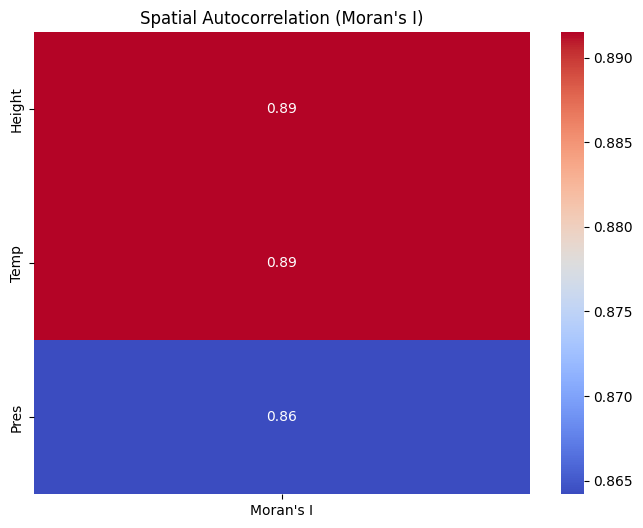

In [13]:
# Visualize the spatial autocorrelation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spatial_corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Spatial Autocorrelation (Moran's I)")
plt.show()
